In [1]:
import sqlite3
import pandas as pd


In [36]:
import mysql.connector
import pandas as pd

# Establish the database connection
conn = mysql.connector.connect(
    host="localhost",           # Adjust host if not local
    user="root",
    password="883245",
    database="tawos"
)


In [15]:

# Define your SQL query
query = """
SELECT 
    Project.Name AS Project_Name,
    AVG(Issue.Total_Effort_Minutes) AS Avg_Effort_Minutes,
    AVG(TIMESTAMPDIFF(MINUTE, Issue.Creation_Date, Issue.Resolution_Date)) AS Avg_Resolution_Time,
    COUNT(Issue.ID) AS Total_Issues,
    Sprint.State AS Sprint_State
FROM 
    Project
JOIN 
    Issue ON Project.ID = Issue.Project_ID
JOIN 
    Sprint ON Project.ID = Sprint.Project_ID
WHERE 
    Sprint.State IN ('Active', 'Completed')  -- Example filter based on Sprint state
GROUP BY 
    Project.Name, Sprint.State
ORDER BY 
    Project.Name;

"""

In [16]:

# Execute query and load data into a DataFrame
df = pd.read_sql(query, conn)

C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\2214879771.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [17]:

# Close the database connection
conn.close()


In [18]:

# Display the first few rows of the data
print(df.head())


                  Project_Name  Avg_Effort_Minutes  Avg_Resolution_Time  \
0                 Apache Mesos        72047.436251         4.028684e+05   
1                 Apache MXNet         8473.677350         6.062710e+04   
2            Atlassian Bamboo        112681.002035         1.102510e+06   
3   Atlassian Confluence Cloud         4021.402794         7.914446e+05   
4  Atlassian Confluence Server        18130.839642         9.465866e+05   

   Total_Issues Sprint_State  
0         20314       ACTIVE  
1          2808       ACTIVE  
2         14252       ACTIVE  
3         70227       ACTIVE  
4         84648       ACTIVE  


In [22]:
!pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


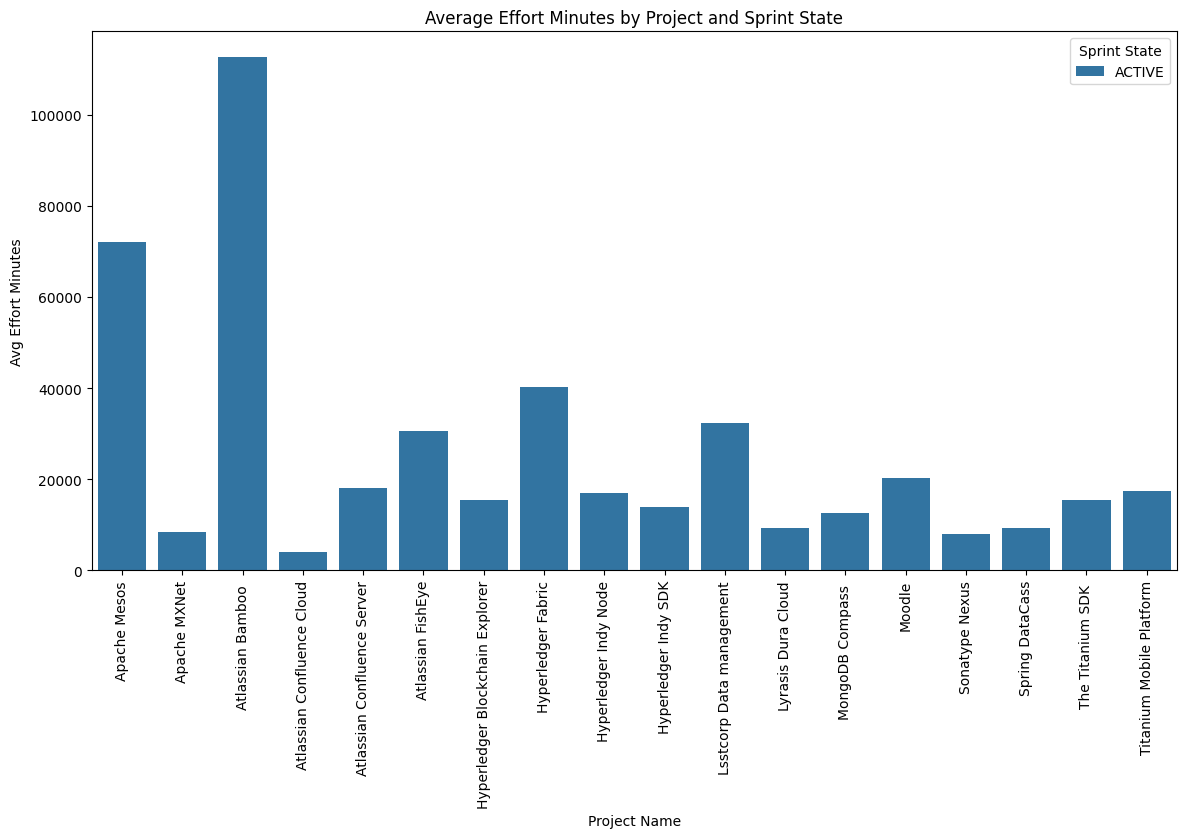

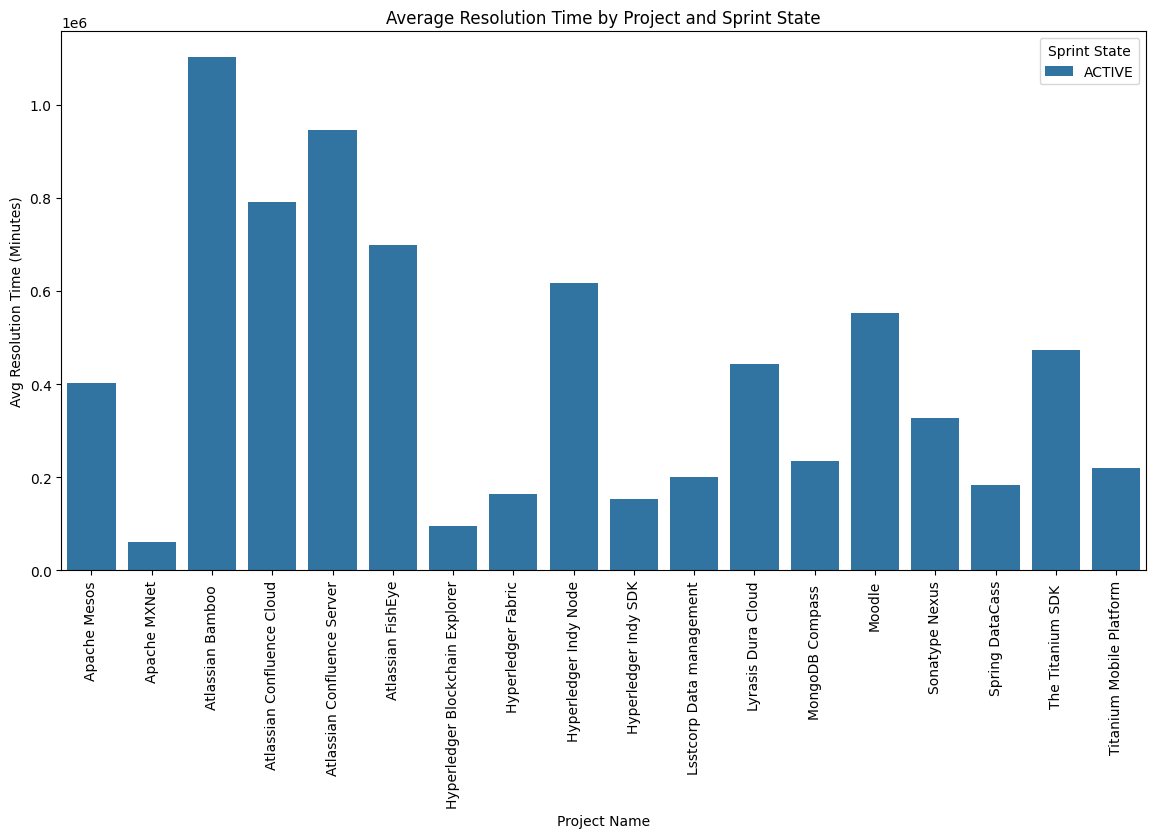

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for visualization
plt.figure(figsize=(14, 7))
sns.barplot(x="Project_Name", y="Avg_Effort_Minutes", hue="Sprint_State", data=df)
plt.xticks(rotation=90)
plt.title("Average Effort Minutes by Project and Sprint State")
plt.ylabel("Avg Effort Minutes")
plt.xlabel("Project Name")
plt.legend(title="Sprint State")
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x="Project_Name", y="Avg_Resolution_Time", hue="Sprint_State", data=df)
plt.xticks(rotation=90)
plt.title("Average Resolution Time by Project and Sprint State")
plt.ylabel("Avg Resolution Time (Minutes)")
plt.xlabel("Project Name")
plt.legend(title="Sprint State")
plt.show()


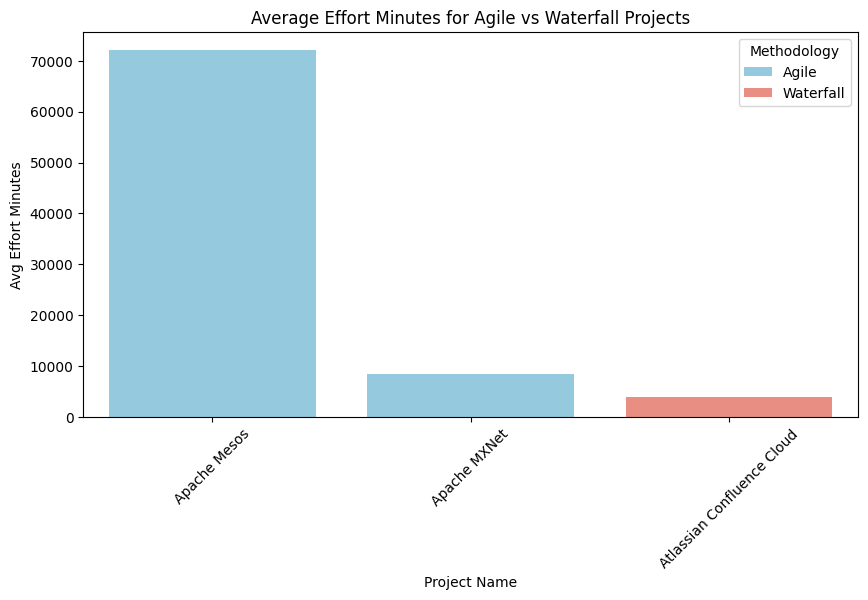

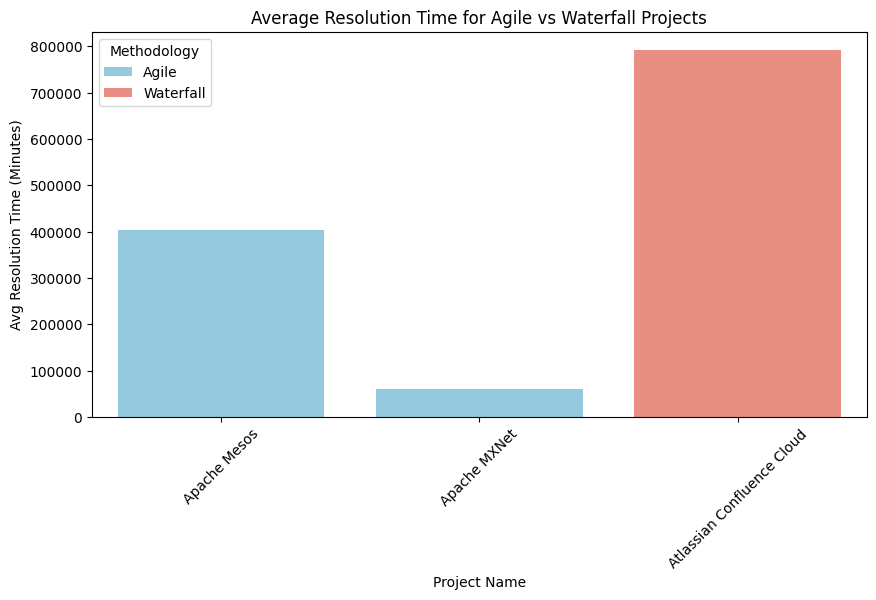

In [24]:
# Define Agile and Waterfall project names based on prior knowledge
agile_projects = ['Apache Mesos', 'Apache MXNet']  # Example Agile projects
waterfall_projects = ['Atlassian Bamboo', 'Atlassian Confluence Cloud']  # Example Waterfall projects

# Filter DataFrames for each methodology
agile_data = df[df['Project_Name'].isin(agile_projects)]
waterfall_data = df[df['Project_Name'].isin(waterfall_projects)]

# Plot comparison for Avg Effort Minutes
plt.figure(figsize=(10, 5))
sns.barplot(x="Project_Name", y="Avg_Effort_Minutes", data=agile_data, color='skyblue', label="Agile")
sns.barplot(x="Project_Name", y="Avg_Effort_Minutes", data=waterfall_data, color='salmon', label="Waterfall")
plt.xticks(rotation=45)
plt.title("Average Effort Minutes for Agile vs Waterfall Projects")
plt.ylabel("Avg Effort Minutes")
plt.xlabel("Project Name")
plt.legend(title="Methodology")
plt.show()

# Plot comparison for Avg Resolution Time
plt.figure(figsize=(10, 5))
sns.barplot(x="Project_Name", y="Avg_Resolution_Time", data=agile_data, color='skyblue', label="Agile")
sns.barplot(x="Project_Name", y="Avg_Resolution_Time", data=waterfall_data, color='salmon', label="Waterfall")
plt.xticks(rotation=45)
plt.title("Average Resolution Time for Agile vs Waterfall Projects")
plt.ylabel("Avg Resolution Time (Minutes)")
plt.xlabel("Project Name")
plt.legend(title="Methodology")
plt.show()


In [26]:
!pip install scipy

  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)


In [27]:
from scipy.stats import ttest_ind

# Extract Avg Effort Minutes for Agile and Waterfall projects
agile_effort = agile_data['Avg_Effort_Minutes']
waterfall_effort = waterfall_data['Avg_Effort_Minutes']

# Perform t-test
t_stat, p_value = ttest_ind(agile_effort, waterfall_effort)
print("T-statistic for Avg Effort Minutes:", t_stat)
print("P-value for Avg Effort Minutes:", p_value)

# Repeat for Avg Resolution Time
agile_resolution = agile_data['Avg_Resolution_Time']
waterfall_resolution = waterfall_data['Avg_Resolution_Time']

t_stat_res, p_value_res = ttest_ind(agile_resolution, waterfall_resolution)
print("T-statistic for Avg Resolution Time:", t_stat_res)
print("P-value for Avg Resolution Time:", p_value_res)


T-statistic for Avg Effort Minutes: 0.6582176571885743
P-value for Avg Effort Minutes: 0.6294042404402986
T-statistic for Avg Resolution Time: -1.8883821290304388
P-value for Avg Resolution Time: 0.31004031908918617


Correlation Matrix:
                     Avg_Effort_Minutes  Avg_Resolution_Time  Total_Issues
Avg_Effort_Minutes             1.000000             0.441597      0.015697
Avg_Resolution_Time            0.441597             1.000000      0.160003
Total_Issues                   0.015697             0.160003      1.000000


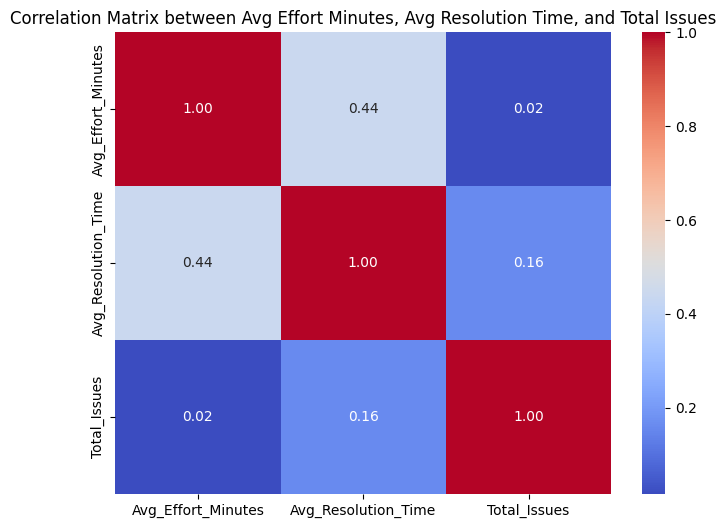

In [28]:
# Calculate correlation matrix
correlation_matrix = df[['Avg_Effort_Minutes', 'Avg_Resolution_Time', 'Total_Issues']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between Avg Effort Minutes, Avg Resolution Time, and Total Issues")
plt.show()


In [31]:
print(df.columns)


Index(['Project_Name', 'Avg_Effort_Minutes', 'Avg_Resolution_Time',
       'Total_Issues', 'Sprint_State'],
      dtype='object')


In [64]:
# Query to calculate average resolution time by Priority and Type
query = """
SELECT 
    Issue.Priority, 
    Issue.Type, 
    AVG(TIMESTAMPDIFF(MINUTE, Issue.Creation_Date, Issue.Resolution_Date)) AS Avg_Resolution_Time
FROM 
    Issue
WHERE 
    Issue.Resolution_Date IS NOT NULL
GROUP BY 
    Issue.Priority, Issue.Type;
"""
df_resolution = pd.read_sql(query, conn)
print(df_resolution)



C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\4240968232.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_resolution = pd.read_sql(query, conn)


          Priority                 Type  Avg_Resolution_Time
0            Minor                Story          166851.0152
1            Minor                  Bug          437546.7695
2            Minor          Improvement          714200.9094
3            Major                  Bug          426355.6808
4         Critical                  Bug          223791.9696
..             ...                  ...                  ...
170        Blocker  Enhancement Request          108496.7908
171                                Task           17675.9524
172  Critical - P2             Question           19821.5063
173   Trivial - P5             Question          333951.9063
174   Blocker - P1             Question           51309.8750

[175 rows x 3 columns]


In [66]:
# Query to get total and average effort minutes for each sprint
query = """
SELECT 
    Sprint.Name AS Sprint_Name,
    Project.Name AS Project_Name,
    AVG(Issue.Total_Effort_Minutes) AS Avg_Effort_Minutes,
    SUM(Issue.Total_Effort_Minutes) AS Total_Effort_Minutes
FROM 
    Sprint
JOIN 
    Issue ON Sprint.ID = Issue.Sprint_ID
JOIN 
    Project ON Sprint.Project_ID = Project.ID
GROUP BY 
    Sprint.Name, Project.Name;
"""
df_sprint_performance = pd.read_sql(query, conn)
print(df_sprint_performance)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\2135292706.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sprint_performance = pd.read_sql(query, conn)


      Sprint_Name          Project_Name  Avg_Effort_Minutes  \
0       Sprint 68             Spring XD         3542.285714   
1       Sprint 67             Spring XD        16209.777778   
2       Sprint 64             Spring XD        10425.000000   
3       Sprint 63             Spring XD        19006.000000   
4       Sprint 62             Spring XD        13875.000000   
...           ...                   ...                 ...   
3539     Sprint 7  Atlassian Jira Cloud            0.000000   
3540     Sprint 8  Atlassian Jira Cloud            0.000000   
3541    Dragonfly  Atlassian Jira Cloud            0.000000   
3542  Dragonfly 4  Atlassian Jira Cloud            0.000000   
3543  Dragonfly 2  Atlassian Jira Cloud            0.000000   

      Total_Effort_Minutes  
0                  24796.0  
1                 145888.0  
2                  10425.0  
3                  95030.0  
4                 166500.0  
...                    ...  
3539                   0.0  
3540       

In [67]:
# Query to count changes in priority or type
query = """
SELECT 
    Project.Name AS Project_Name,
    COUNT(*) AS Priority_Type_Changes
FROM 
    Change_Log
JOIN 
    Issue ON Change_Log.Issue_ID = Issue.ID
JOIN 
    Project ON Issue.Project_ID = Project.ID
WHERE 
    Change_Log.Field IN ('Priority', 'Type')
GROUP BY 
    Project.Name;
"""
df_priority_changes = pd.read_sql(query, conn)
print(df_priority_changes)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\1847323272.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_priority_changes = pd.read_sql(query, conn)


                           Project_Name  Priority_Type_Changes
0                             Spring XD                    155
1                       Spring DataCass                     43
2                        Sonatype Nexus                    817
3                          Apache Mesos                    902
4                       Apache Usergrid                    343
5                          Apache MXNet                     36
6                       Alloy Framework                    933
7                         Aptana Studio                   4699
8                Command-Line Interface                    358
9                   Appcelerator Daemon                    201
10             Titanium Mobile Platform                   2013
11                     Atlassian Clover                    124
12                      Atlassian Crowd                    465
13                    Atlassian FishEye                    967
14             Atlassian Software Cloud                

In [68]:
# Query to calculate average effort per developer
query = """
SELECT 
    User.ID AS Developer_ID,
    AVG(Issue.Total_Effort_Minutes) AS Avg_Effort_Minutes
FROM 
    Issue
JOIN 
    User ON Issue.Creator_ID = User.ID
GROUP BY 
    User.ID;
"""
df_developer_effort = pd.read_sql(query, conn)
print(df_developer_effort)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\3648726017.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_developer_effort = pd.read_sql(query, conn)


       Developer_ID  Avg_Effort_Minutes
0                68            0.000000
1                69            0.000000
2                70            0.000000
3                72         4602.044684
4                73            0.000000
...             ...                 ...
74512        209121            0.000000
74513        209122            0.000000
74514        208978            0.000000
74515        209123            0.000000
74516        209125            0.000000

[74517 rows x 2 columns]


In [69]:
# Query to count unresolved issues (backlog size) per project
query = """
SELECT 
    Project.Name AS Project_Name,
    COUNT(*) AS Backlog_Size
FROM 
    Issue
JOIN 
    Project ON Issue.Project_ID = Project.ID
WHERE 
    Issue.Status != 'Resolved'
GROUP BY 
    Project.Name;
"""
df_backlog = pd.read_sql(query, conn)
print(df_backlog)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\3610507190.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_backlog = pd.read_sql(query, conn)


                           Project_Name  Backlog_Size
0                             Spring XD          3707
1                       Spring DataCass           756
2                        Sonatype Nexus          9912
3                          Apache Mesos          3068
4                       Apache Usergrid          1307
5                          Apache MXNet          1404
6                       Alloy Framework          1020
7                         Aptana Studio          7341
8                Command-Line Interface           526
9                   Appcelerator Daemon            44
10             Titanium Mobile Platform          2974
11                     Atlassian Clover          1501
12                      Atlassian Crowd          4311
13                    Atlassian FishEye          5533
14                Atlassian Jira Server         44165
15             Atlassian Software Cloud         11702
16  Atlassian Atlassian Software Server         12862
17                    Atlass

In [70]:
# Query to calculate average cycle time in days
query = """
SELECT 
    Project.Name AS Project_Name,
    AVG(TIMESTAMPDIFF(DAY, Issue.Creation_Date, Issue.Resolution_Date)) AS Avg_Cycle_Time_Days
FROM 
    Issue
JOIN 
    Project ON Issue.Project_ID = Project.ID
WHERE 
    Issue.Resolution_Date IS NOT NULL
GROUP BY 
    Project.Name;
"""
df_cycle_time = pd.read_sql(query, conn)
print(df_cycle_time)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\1978247975.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cycle_time = pd.read_sql(query, conn)


                           Project_Name  Avg_Cycle_Time_Days
0                             Spring XD              57.6901
1                       Spring DataCass             127.3866
2                        Sonatype Nexus             227.5084
3                          Apache Mesos             279.2932
4                       Apache Usergrid              90.9729
5                          Apache MXNet              41.6495
6                       Alloy Framework             101.4119
7                         Aptana Studio             670.5836
8                Command-Line Interface             198.2939
9                   Appcelerator Daemon              99.7739
10             Titanium Mobile Platform             151.7332
11                     Atlassian Clover             842.9867
12                      Atlassian Crowd             397.6433
13                    Atlassian FishEye             484.3746
14                Atlassian Jira Server             664.3821
15             Atlassian

In [71]:
# Query to calculate estimation accuracy in minutes
query = """
SELECT 
    Project.Name AS Project_Name,
    AVG(ABS(TIMESTAMPDIFF(MINUTE, Issue.Estimation_Date, Issue.Resolution_Date) - Issue.Total_Effort_Minutes)) AS Estimation_Accuracy
FROM 
    Issue
JOIN 
    Project ON Issue.Project_ID = Project.ID
WHERE 
    Issue.Estimation_Date IS NOT NULL AND Issue.Resolution_Date IS NOT NULL
GROUP BY 
    Project.Name;
"""
df_estimation_accuracy = pd.read_sql(query, conn)
print(df_estimation_accuracy)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\1329432639.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_estimation_accuracy = pd.read_sql(query, conn)


                           Project_Name  Estimation_Accuracy
0                             Spring XD         7.725454e+04
1                       Spring DataCass         3.667924e+05
2                        Sonatype Nexus         2.650945e+05
3                          Apache Mesos         4.449509e+05
4                       Apache Usergrid         9.594305e+04
5                          Apache MXNet         4.391908e+04
6                       Alloy Framework         2.093108e+05
7                         Aptana Studio         1.264250e+05
8                Command-Line Interface         1.871847e+05
9                   Appcelerator Daemon         1.234151e+05
10             Titanium Mobile Platform         1.590929e+05
11                     Atlassian Clover         1.123161e+06
12                      Atlassian Crowd         3.740748e+05
13                    Atlassian FishEye         4.223995e+05
14             Atlassian Software Cloud         2.186492e+05
15  Atlassian Atlassian 

In [72]:
# Query to calculate defect density per project
query = """
SELECT 
    Project.Name AS Project_Name,
    COUNT(Issue.ID) / SUM(Issue.Total_Effort_Minutes) AS Defect_Density
FROM 
    Issue
JOIN 
    Project ON Issue.Project_ID = Project.ID
GROUP BY 
    Project.Name;
"""
df_defect_density = pd.read_sql(query, conn)
print(df_defect_density)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\3395233706.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_defect_density = pd.read_sql(query, conn)


                           Project_Name  Defect_Density
0                             Spring XD        0.000172
1                       Spring DataCass        0.000107
2                        Sonatype Nexus        0.000124
3                          Apache Mesos        0.000014
4                       Apache Usergrid        0.000126
5                          Apache MXNet        0.000118
6                       Alloy Framework        0.000146
7                         Aptana Studio        0.000152
8                Command-Line Interface        0.000043
9                   Appcelerator Daemon        0.000038
10             Titanium Mobile Platform        0.000057
11                     Atlassian Clover        0.000027
12                      Atlassian Crowd        0.000106
13                    Atlassian FishEye        0.000033
14                Atlassian Jira Server        0.000021
15             Atlassian Software Cloud        0.000159
16  Atlassian Atlassian Software Server        0

In [73]:
# Query to load story points and resolution time
query = """
SELECT 
    Issue.Story_Point,
    TIMESTAMPDIFF(MINUTE, Issue.Creation_Date, Issue.Resolution_Date) AS Resolution_Time_Minute
FROM 
    Issue
WHERE 
    Issue.Story_Point IS NOT NULL AND Issue.Resolution_Date IS NOT NULL;
"""
df_story_points = pd.read_sql(query, conn)

# Calculate correlation
correlation = df_story_points['Story_Point'].corr(df_story_points['Resolution_Time_Minute'])
print("Correlation between Story Point and Resolution Time:", correlation)


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\1899661033.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_story_points = pd.read_sql(query, conn)


Correlation between Story Point and Resolution Time: 0.004929540850200155


C:\Users\mtufa\AppData\Local\Temp\ipykernel_17660\2158342389.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(query, conn)


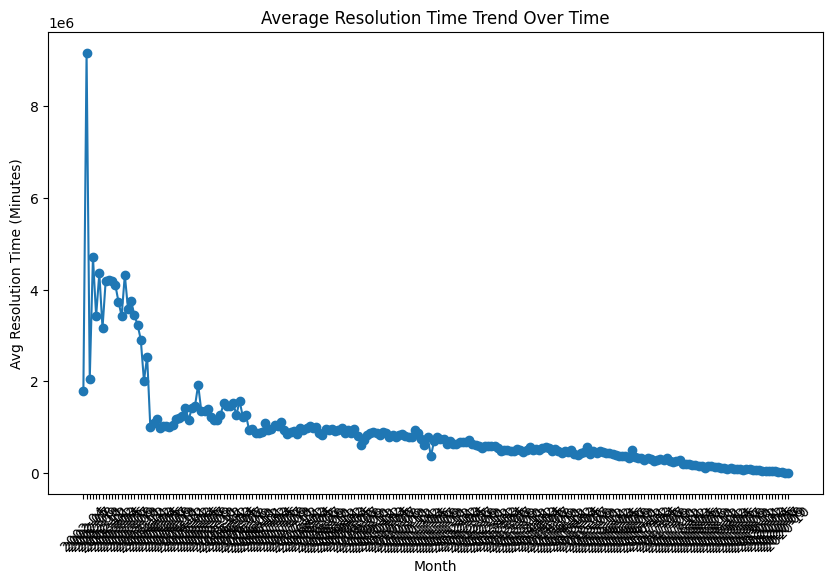

In [74]:
# Query to get monthly resolution time trend
query = """
SELECT 
    DATE_FORMAT(Issue.Creation_Date, '%Y-%m') AS Month,
    AVG(TIMESTAMPDIFF(MINUTE, Issue.Creation_Date, Issue.Resolution_Date)) AS Avg_Resolution_Time
FROM 
    Issue
WHERE 
    Issue.Resolution_Date IS NOT NULL
GROUP BY 
    Month
ORDER BY 
    Month;
"""
df_trend = pd.read_sql(query, conn)

# Plot the trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_trend['Month'], df_trend['Avg_Resolution_Time'], marker='o')
plt.xticks(rotation=45)
plt.title("Average Resolution Time Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Avg Resolution Time (Minutes)")
plt.show()
